<a href="https://colab.research.google.com/github/nachi-hebbar/ARIMA-Temperature_Forecasting/blob/master/Temperature_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np

#Read Data

In [23]:
df=pd.read_csv('gs://dataproc-staging-asia-southeast1-486650843789-dpb1jzlc/NFT_Sales.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df.tail()

Shape of data (1605, 1)


,Sales_USD
Date,
2021-11-08,7.706698e+07
2021-11-09,5.197508e+07
2021-11-10,5.901034e+07
2021-11-11,3.554317e+07
2021-11-12,6.196720e+06


#Plot Your Data

<AxesSubplot:xlabel='Date'>

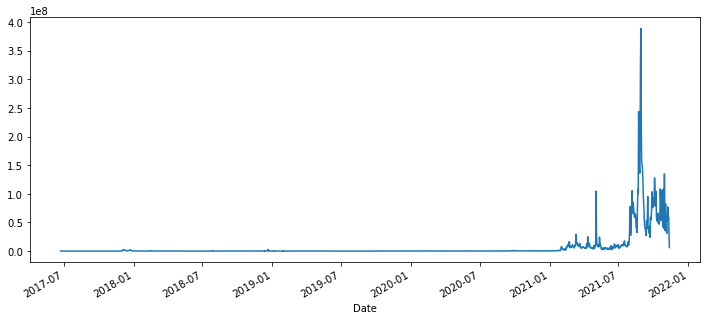

In [24]:
df['Sales_USD'].plot(figsize=(12,5))

#Check For Stationarity

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [26]:
adf_test(df['Sales_USD'])

1. ADF :  -2.7860608291623326
2. P-Value :  0.06029263112011395
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1579
5. Critical Values :
	 1% :  -3.4344981713985487
	 5% :  -2.863372170679779
	 10% :  -2.5677454141697496


#Figure Out Order for ARIMA Model

In [27]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
stepwise_fit = auto_arima(df['Sales_USD'], trace=True,start_p=1,
                          suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=56178.767, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=56324.146, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=56318.067, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=56307.139, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56322.147, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=56176.783, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=56178.749, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=56218.586, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=56177.354, Time=1.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=56174.789, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=56305.140, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=56176.770, Time=0.47 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=56176.756, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=56216.632, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1605
Model:               SARIMAX(0, 1, 2)   Log Likelihood              -28084.394
Date:                Tue, 12 Apr 2022   AIC                          56174.789
Time:                        07:49:25   BIC                          56190.930
Sample:                             0   HQIC                         56180.782
                               - 1605                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1226      0.005    -26.631      0.000      -0.132      -0.114
ma.L2         -0.2764      0.005    -51.495      0.000      -0.287      -0.266
sigma2      9.526e+13        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            524093.72
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):           15855.14   Skew:                             3.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        91.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.45e+46. Standard errors may be unstable.
"""

In [68]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing

In [69]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1605, 1)
(1575, 1) (30, 1)
Sales_USD    48880556.46
Name: 2021-10-14 00:00:00, dtype: float64 Sales_USD    6.196720e+06
Name: 2021-11-12 00:00:00, dtype: float64


## Train the Model

In [70]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Sales_USD'],order=(0,1,2))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sales_USD   No. Observations:                 1575
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -27385.877
Date:                Tue, 12 Apr 2022   AIC                          54777.755
Time:                        07:56:41   BIC                          54793.839
Sample:                             0   HQIC                         54783.732
                               - 1575                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0400      0.004     -9.992      0.000      -0.048      -0.032
ma.L2         -0.2532      0.005    -54.121      0.000      -0.262      -0.244
sigma2      7.751e+13   1.16e-17   6.69e+30      0.000    7.75e+13    7.75e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):           1119260.46
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):           13083.56   Skew:                             4.02
Prob(H) (two-sided):                  0.00   Kurtosis:                       133.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+45. Standard errors may be unstable.
"""

#Make Predictions on Test Set

<AxesSubplot:xlabel='Date'>

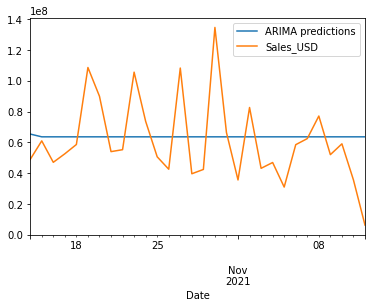

In [71]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=df.index[start:end+1]
#print(pred)
#pred.index=index_future_dates
pred.plot(legend=True)
test['Sales_USD'].plot(legend=True)


<AxesSubplot:xlabel='Date'>

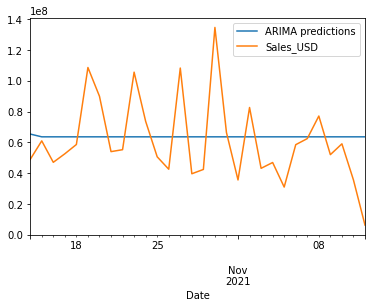

In [72]:
pred.plot(legend='ARIMA Predictions')
test['Sales_USD'].plot(legend=True)

In [73]:
test['Sales_USD'].mean()

60957959.77566663

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Sales_USD']))
print(rmse)


26766095.818180505


In [78]:
model2=ARIMA(df['Sales_USD'],order=(0,1,2))
model2=model2.fit()
df.tail()

,Sales_USD
Date,
2021-11-08,7.706698e+07
2021-11-09,5.197508e+07
2021-11-10,5.901034e+07
2021-11-11,3.554317e+07
2021-11-12,6.196720e+06


#For Future Dates

In [79]:
index_future_dates=pd.date_range(start='2021-11-12',end='2021-12-12')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-11-12    1.772158e+07
2021-11-13    2.600635e+07
2021-11-14    2.600635e+07
2021-11-15    2.600635e+07
2021-11-16    2.600635e+07
2021-11-17    2.600635e+07
2021-11-18    2.600635e+07
2021-11-19    2.600635e+07
2021-11-20    2.600635e+07
2021-11-21    2.600635e+07
2021-11-22    2.600635e+07
2021-11-23    2.600635e+07
2021-11-24    2.600635e+07
2021-11-25    2.600635e+07
2021-11-26    2.600635e+07
2021-11-27    2.600635e+07
2021-11-28    2.600635e+07
2021-11-29    2.600635e+07
2021-11-30    2.600635e+07
2021-12-01    2.600635e+07
2021-12-02    2.600635e+07
2021-12-03    2.600635e+07
2021-12-04    2.600635e+07
2021-12-05    2.600635e+07
2021-12-06    2.600635e+07
2021-12-07    2.600635e+07
2021-12-08    2.600635e+07
2021-12-09    2.600635e+07
2021-12-10    2.600635e+07
2021-12-11    2.600635e+07
2021-12-12    2.600635e+07
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

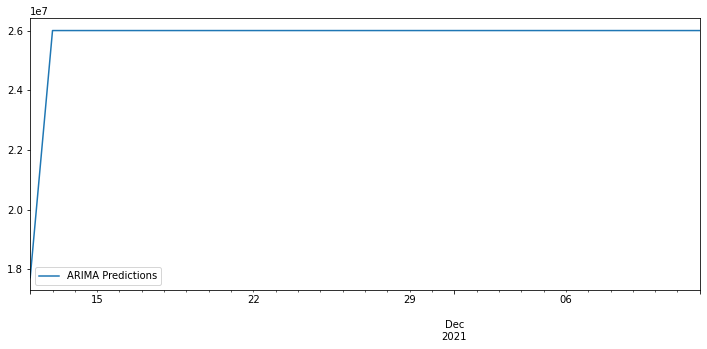

In [80]:
pred.plot(figsize=(12,5),legend=True)
